# Effects and Conclutions of Loan Characteristics on Borrower's APR
## by: Mubarak Gwandu


## Investigation Overview

In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income


## Dataset Overview

Prosper is a peer-to-peer lending platform that allows investors to choose among personal loans to invest in. They do that by considering a number of factors, which include a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [19]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan_s = loan[cols]

In [20]:
# data wrangling, remove loans with missing borrower APR information
loan_s = loan_s[~loan_s.BorrowerAPR.isna()]

In [21]:
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loan_s = loan_s[loan_s.StatedMonthlyIncome<=30000]

In [22]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rate_order)

loan_s['ProsperRating (Alpha)'] = loan_s['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = emp_order)

loan_s['EmploymentStatus'] = loan_s['EmploymentStatus'].astype(ordered_var)

In [23]:
print(loan_s.shape)
loan_s.head()

(113585, 6)


,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed


## Distribution of Borrower APR

The dispersion of APR looks multimodal. There's a peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Interestingly, there is a very sharp peak between 0.35 and 0.36, only very few loans have APR greater than 0.4.

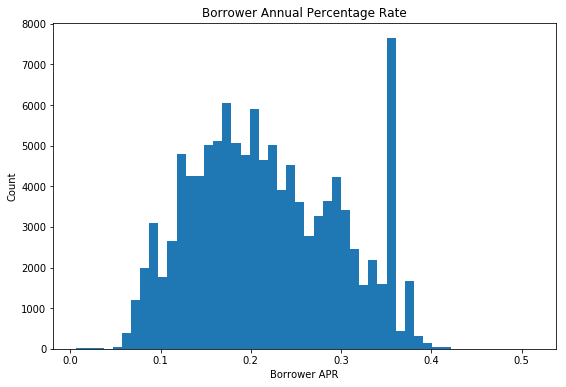

In [24]:
bins = np.arange(0, loan_s.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize = [9, 6])
sb.distplot(loan_s['BorrowerAPR'], hist_kws = {'alpha' : 1}, kde = False)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Borrower Annual Percentage Rate');

## Distribution of Original Loan Amount
The very large spikes in frequency are at 10,000, 15,000, 20,000 and 25,000. There are also small spikes at the intervals such as at 8000, 12,000 and so forth. It shows that most of the loans are multiples of 5000.

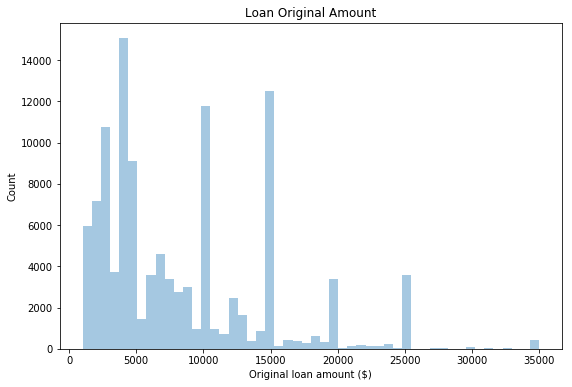

In [13]:
bins = np.arange(9000, loan_s.LoanOriginalAmount.max()+500, 500)
plt.figure(figsize = [9, 6])
sb.distplot(loan_s['LoanOriginalAmount'], kde=False)
#plt.hist(data = loan_s, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)')
plt.ylabel('Count')
plt.title('Loan Original Amount');

## Borrower APR vs. Prosper Rating
For people with B-AA ratings, the APR increase with the increase of borrow term. But the borrower APR decrease with the increase of borrow term for people with HR-C raings.

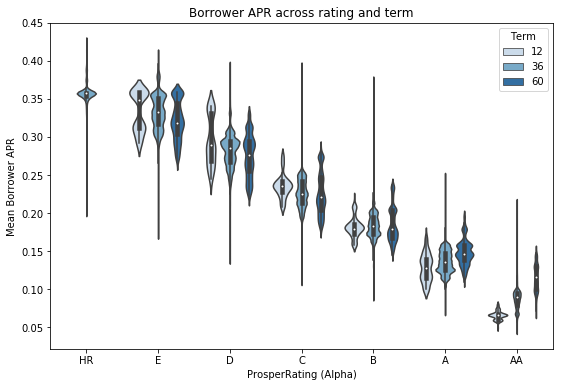

In [14]:
fig = plt.figure(figsize = [9,6])
ax = sb.violinplot(data = loan_s, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

## Borrower APR by Loan Amount
Borrower APR's correlation coefficient and Loan Original Amount is -0.32, the scatter plot also shows that these two variables are negatively correlated, which agrees with our previous hypothesis, that is the higher the loan amount, the lower the APR. The Loan Original Amount is positively correlated with the Stated Monthly Income, it makes sense since borrowers with higher monthly income could go for bigger loans.

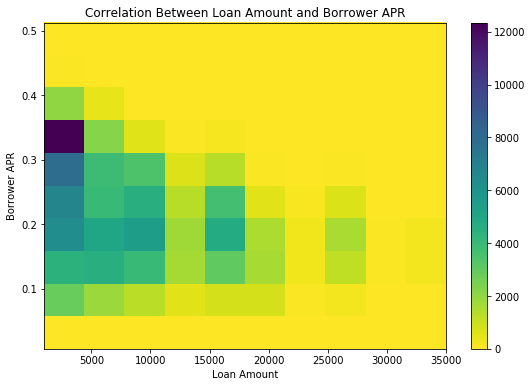

In [15]:
# correlation plot
plt.figure(figsize = [9, 6])
plt.hist2d(data = loan_s, x = 'LoanOriginalAmount', y = 'BorrowerAPR', cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR')
plt.title('Correlation Between Loan Amount and Borrower APR');

## Prosper Rating Effect on Relationship between APR and Loan Amount
It seems like there is an interaction effect between term and rating for Stated Monthly Income, the pattern of Term is similar among different ratings. But for Loan Amount, there is an interaction between term and rating. We can observe that with better Prosper rating, the Loan Amount of all three terms increases.

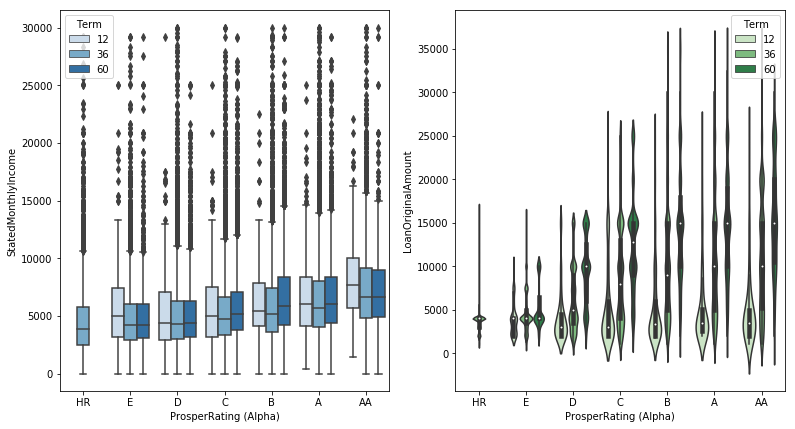

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=[13,7])
sb.boxplot(data = loan_s, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues', dodge = 0.4, ax=ax[0])
sb.violinplot(data = loan_s, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);